***
# <font> Exploratory Data Analysis on Breast Cancer Dataset</font>
<p style="margin-left:10%; margin-right:10%;"> <font color=teal> 

***

## Overview of this Notebook
The most important element in any data science project is the data itself. It is extremely important that this data is as clear as possible, so that we do not misinterpret any structure inherent to the problem.  
Data Preparations for training a Machine Learning model involves Data Transformations and Manipulations. This step is a very important step and takes typically 80% of the time in the entire life cycle of a Machine Learning Model. The real world data is mostly incomplete, and has several missing values. Missing values can be because of the unavailability of data or inconsistancy present in the data. There might be several errors and outliers present in the data. 
Preprocessing of data involves various steps
1. Combinating attributes or columns  
2. Data Imputation
3. Data Cleaning
4. Dummy Variables Encoding
5. Outlier Detection
6. Feature Scaling
7. Feature Engineering
8. Feature Selection
9. Feature Extration.


This notebook will demonstrate the core functionality of the Dataset Factory class. In this notebook, you will learn some of the many ways to clean and transform data in an `ADSDatasetFactory` Object.
When datasets are loaded with DatasetFactory, they can be transformed and manipulated easily with the built-in functions. Underlying, an ADSDataset object is a Pandas dataframe. Any operation that can be performed to a Pandas dataframe can also be applied to an ADS Dataset.


First the necessary imports are made. From ads, DatasetBrowser, dataset factory, feature_engineering are imported. pandas, numpy packages are also imported. From plots matplotlib.pyplot is imported.

Please select the  pubhished conda envionment data-science-gmlv1_0_v1 before proceeding further. 

In [1]:
import ads
import logging
import numpy as np
import os
import pandas as pd
import shutil
import tempfile
import warnings
from ads.dataset.dataset_browser import DatasetBrowser
from ads.dataset.factory import DatasetFactory
from os import path
from sqlalchemy import create_engine
import seaborn as sns

from ads.dataset.dataset_browser import DatasetBrowser
from ads.feature_engineering import feature_type_manager, FeatureType
import matplotlib.pyplot as plt
from os import path

warnings.filterwarnings('ignore')
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

In [2]:
ads.hello()



  O  o-o   o-o
 / \ |  \ |
o---o|   O o-o
|   ||  /     |
o   oo-o  o--o

ads v2.8.11
oci v2.114.0
ocifs v1.1.3




## Load The Dataset

<font color=gray>Datasets are provided as a convenience.  Datasets are considered Third Party
Content and are not considered Materials under Your agreement with Oracle
applicable to the Services.  </font>

There are many ways of Loading the Dataset. The simplest among them is to Download the csv and upload it. The csv file will be available in the left pane. You can open datasets with DatasetFactory or DatasetBrowser. DatasetFactory allows datasets to be loaded into ADS. 
DatasetBrowser supports opening the datasets from web sites and libraries, such as scikit-learn directly into ADS. 
When you open a dataset in DatasetFactory, you can get the summary statistics, correlations, and visualizations of the dataset. 
The dataset used in this practise session is the Breast Cancer dataset. This dataset is available in sklearn. Alternatively it can be downloaded <here> (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data). In the first practise session, both ways of loading the dataset is shown. To start with the breast cancer dataset is downloaded as csv file and is uploaded. 

In [3]:
breastcancer = DatasetFactory.open("bc.csv")

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [4]:
breastcancer.shape

(569, 33)

The shape method is used for finding the size of the dataset. Breastcancer dataset has 33 columns and 569 rows. Let us see the summary of the dataset

In [5]:
breastcancer.summary()

,Feature,Datatype
0,id,ordinal/int64
1,diagnosis,categorical/object
2,radius_mean,continuous/float64
3,texture_mean,continuous/float64
4,perimeter_mean,continuous/float64
5,area_mean,continuous/float64
6,smoothness_mean,continuous/float64
7,compactness_mean,continuous/float64
8,concavity_mean,continuous/float64
9,concave_points_mean,continuous/float64


There are 33 columns. The colums define the type of feature pertaining to breast cancer. The target or output is diagnosis. 

In [6]:
breastcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed:_32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The target Diagnosis takes two values "B" and "M" which stands for Benign and Malignant respectively
We can use `value_counts` to get the class label and frequency for a specific column in our dataset.

In [7]:
breastcancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

The target diagnosis has around 63% Benign and 37% Malignant. So this is not a clear case of class imbalance problem. Let us check out for the null values present in the dataset. The 'isna()' function is used to check null values. 

In [8]:
breastcancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave_points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave_points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Out of the 33 attributes, the last column has no values present and can be removed

In [9]:
transformed_breastcancer = breastcancer.drop(breastcancer.columns[[-1, 0]], axis=1)
#transformed_breastcancer.head()

In [10]:
transformed_breastcancer.shape

(569, 31)

The drop method is used to drop a column. The axis=1 indicates that it is a column which needs to be dropped

In [11]:
transformed_breastcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
perimeter_max = transformed_breastcancer['perimeter_mean'].max()
perimeter_min = transformed_breastcancer['perimeter_mean'].min()
perimeter_range = perimeter_max - perimeter_min
perimeter_norm = (transformed_breastcancer['perimeter_mean'] - perimeter_min) / (perimeter_max - perimeter_min)
perimeter_norm = transformed_breastcancer.assign_column('perimeter_norm', perimeter_norm)

This task needs to be performed to normalize columns. This is cumbersome process performed by datascientist. The columns with continuous values needs normalization. Data Normalisation involves adjusting values measured on different scales to a common scale. When dealing with dataframes, data normalization permits to adjust values referred to different columns to a common scale. This operation is strongly recommended when the columns of a dataframe are considered as input features of a machine learning algorithm, because it permits to give all the features the same weight.

Normalization applies only to columns containing numeric values. In the breast cancer dataset, texture_worst, perimeter_worst, area_worst, area_mean, perimeter_mean, texture_mean, radius_mean needs to be normalized. 

### Categorical Encoding
`ADSDataset` has a built-in categorical encoder. We can access it directly using the import in the following cell. Simply pass in our dataset object, and it will be automatically encoded. We demonstrate this in the following cell and use the `value_counts` function as verification.

In [13]:
from ads.dataset.label_encoder import DataFrameLabelEncoder
breastcancer_encoded = DataFrameLabelEncoder().fit_transform(transformed_breastcancer.to_pandas_dataframe())
breastcancer_encoded['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

By using categorical Encoding, the Malignent and Benign cases are coded as 0 and 1 respectively

## Using Feature Types in Exploratory data analysis
In exploratory data analysis (EDA) the data scientist uses plots and statistics to summarize the characteristics of the data. The feature type system, in the ADS library, has been designed to speed up this process. The feature type system allows data scientists to separate the concept of how data is represented physically from what the data actually measures. The data can have feature types that classify the data based on what it represents and not how the data is stored in memory. In doing so, a feature type can have a set of built-in summary statistics and a plot.

In [14]:
breastcancer_encoded.ads.feature_type

{'diagnosis': ['integer'],
 'radius_mean': ['continuous'],
 'texture_mean': ['continuous'],
 'perimeter_mean': ['continuous'],
 'area_mean': ['continuous'],
 'smoothness_mean': ['continuous'],
 'compactness_mean': ['continuous'],
 'concavity_mean': ['continuous'],
 'concave_points_mean': ['continuous'],
 'symmetry_mean': ['continuous'],
 'fractal_dimension_mean': ['continuous'],
 'radius_se': ['continuous'],
 'texture_se': ['continuous'],
 'perimeter_se': ['continuous'],
 'area_se': ['continuous'],
 'smoothness_se': ['continuous'],
 'compactness_se': ['continuous'],
 'concavity_se': ['continuous'],
 'concave_points_se': ['continuous'],
 'symmetry_se': ['continuous'],
 'fractal_dimension_se': ['continuous'],
 'radius_worst': ['continuous'],
 'texture_worst': ['continuous'],
 'perimeter_worst': ['continuous'],
 'area_worst': ['continuous'],
 'smoothness_worst': ['continuous'],
 'compactness_worst': ['continuous'],
 'concavity_worst': ['continuous'],
 'concave_points_worst': ['continuous'

The feature_type property is used to store the feature types that are to be associated with a dataset. It accepts an ordered list of the feature types that are to be associated with the dataset. 

The `.feature_count()` method is called on the dataframe in the next cell. It provides a summary of what features are being used across all features in the dataframe. The output dataframe has one row for each feature type that is represented in the dataframe. This is listed in the Feature Type column. The next column lists the number of times the feature type appears in any of the columns.

In [15]:
breastcancer_encoded.ads.feature_count()

,Feature Type,Count,Primary
0,integer,1,1
1,continuous,30,30


The `.feature_stat()` method also works at the dataframe level. It will produce a similar output to the output for the series, except it will have an additional column that lists the column name where the metric was computed.

In [16]:
breastcancer_encoded.ads.feature_stat()

,Column,Metric,Value
0,diagnosis,count,569.000000
1,diagnosis,mean,0.372583
2,diagnosis,standard deviation,0.483918
3,diagnosis,sample minimum,0.000000
4,diagnosis,lower quartile,0.000000
...,...,...,...
273,fractal_dimension_worst,lower quartile,0.071000
274,fractal_dimension_worst,median,0.080000
275,fractal_dimension_worst,upper quartile,0.092000
276,fractal_dimension_worst,sample maximum,0.208000


# Correlation

Generally, a data scientist wants to make a model as parsimonious as possible. This often involves determining what features are highly correlated and removing some of them. While some models such as decision trees are not sensitive to correlated variables, other ones such as ordinary least squares regression are. You may also want to remove correlated variables at it reduces the cost of collecting and processing the data.

The EDA features in ADS speed up your analysis by providing methods to compute different types of correlations. There are several different correlation techniques provided as they have different use cases. Further, there are two sets of methods. One method returns a dataframe with the correlation information and it has a partner method that generates a plot.

What correlation technique you use depends on the type of data that you are working with. When using these correlation techniques you will need to slice your dataframe so that only the appropriate feature types are used in the calculation.

<AxesSubplot:title={'center':"Pearson's Correlation"}>

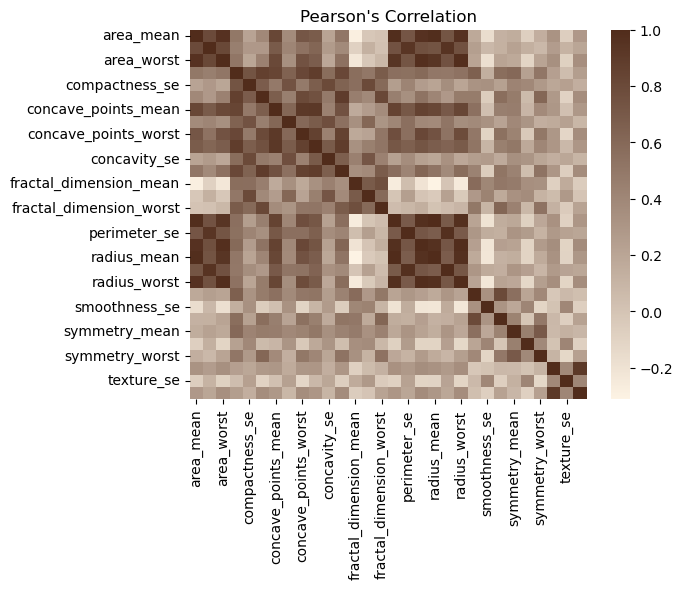

In [17]:
breastcancer_encoded.ads.pearson_plot()

ADS offers a smart visualization tool that automatically detects the type of your data columns and offers the best way to plot your data. You can also create custom visualizations with ADS by using your preferred plotting libraries and packages. The correlation plot gives an idea on totally correlated pairwise attributes. Highly correlated attributes contribute less to decision making. So it is better to avoid those attributes. So the tranformed dataset ensures that such attributes are avoided. The drop column feature drops those columns which are correlated. Show_in_notebook() shows these correlations in the form of heatmaps. 

The ADS show_in_notebook() method creates a comprehensive preview of all the basic information about a dataset including:

a. The predictive data type (for example, regression, binary classification, or multinomial classification).

b. The number of columns and rows.

c. Feature type information.

d. Summary visualization of each feature.

e. The correlation map.

f. Any warnings about data conditions that you should be aware of.

To improve plotting performance, the ADS show_in_notebook() method uses an optimized subset of the data. This smart sample is selected so that it is statistically representative of the full dataset. The correlation map is only displayed when the data only has numerical (continuous or oridinal) columns.

In [18]:
breastcancer.show_in_notebook()

Accordion(children=(HTML(value='<h1>Name: DataFrame from bc.csv</h1><h3>Type: ADSDataset</h3><h3>569 Rows, 33 …

## Automated Transformations
ADS has built in automatic transform tools for datasets. When the get_recommendations() tool is applied to an ADSDataset object, it shows the user detected issues with the data and recommends changes to apply to the dataset. You can accept the changes is as easy as clicking a button in the drop down menu. After all the changes are applied, the transformed dataset can be retrieved by calling get_transformed_dataset().
We first open the datasets available in sklearn DatasetBrowser. sklearn has a list of 5 datasets. Breast-cancer, wine, diabetes, iris,digits datasets

In [19]:
sklearn = DatasetBrowser.sklearn()
bc = sklearn.open('breast_cancer')
sklearn.list()

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

['breast_cancer', 'diabetes', 'iris', 'wine', 'digits']

In [20]:
bc.get_recommendations()

Output()

In [21]:
bc.select_best_features()

target,worst_concave_points,worst_perimeter,mean_concave_points,worst_radius,mean_perimeter,worst_area,mean_radius,mean_area,mean_concavity,worst_concavity,mean_compactness,worst_compactness
malignant,0.265400,184.600000,0.147100,25.380000,122.800000,2019.000000,17.990000,1001.000000,0.300100,0.711900,0.277600,0.665600
malignant,0.186000,158.800000,0.070170,24.990000,132.900000,1956.000000,20.570000,1326.000000,0.086900,0.241600,0.078640,0.186600
malignant,0.243000,152.500000,0.127900,23.570000,130.000000,1709.000000,19.690000,1203.000000,0.197400,0.450400,0.159900,0.424500
malignant,0.257500,98.870000,0.105200,14.910000,77.580000,567.700000,11.420000,386.100000,0.241400,0.686900,0.283900,0.866300
malignant,0.162500,152.200000,0.104300,22.540000,135.100000,1575.000000,20.290000,1297.000000,0.198000,0.400000,0.132800,0.205000


BinaryClassificationDataset(target: target) 569 rows, 13 columns

The 'select_best_features' automatically retains the best features. 

Alternatively, you can use auto_transform() to apply all the recommended transformations at once. auto_transform() returns a transformed dataset with several optimizations applied automatically. The optimizations include:

1. Dropping constant and primary key columns, which has no predictive quality.

2. Imputation to fill in missing values in noisy data.

3. Dropping strongly co-correlated columns that tend to produce less generalizable models.

4. Balancing a dataset using up or down sampling. 

In [22]:
bc1 = bc.auto_transform()

loop1:   0%|          | 0/7 [00:00<?, ?it/s]

You can visualize the transformation that has been performed on a dataset by calling visualize_transforms()

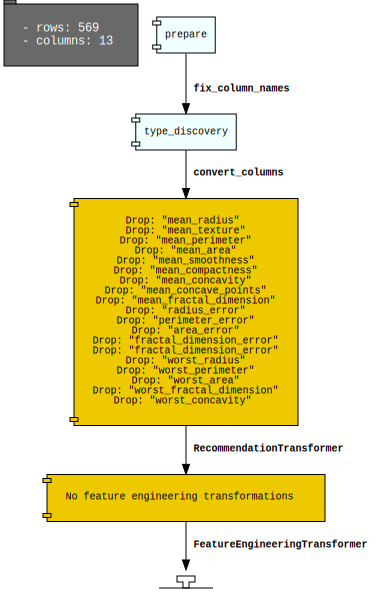

In [23]:
bc1.visualize_transforms()

Breast cancer data was initially loaded as a csv file. It was examined for the prospective data preprocessing steps. Later the breast cancer dataset as part of sklearn was taken and the auto-transform features of ADS was applied on it. The data preprocessing step which is time consuming is completed automated using the rich features of ADS